## What is K means ?

This unsupervised algorithm partitions the dataset into K clusters, determines the mean of each cluster as its centroid, and strives to minimize the variance within each cluster.

# Step by step how K means Cluster works

1) Select K random clusters.

2) Calculate the centroid for each cluster and assign each data point to the nearest centroid.

3) Compute the Euclidean distance for each data point to its assigned centroid and update the centroids to be the mean of all data points in each cluster.

4) Repeat steps 2 and 3 until convergence is achieved.

#Using Update Gradient Descent in K means algorithm

# Through iterative updates of the centroids, the algorithm converges to a set of centroids that minimize the objective function.\

LETS SEE WITH THE CODE



import libraries and a dummy data set with make_blobs and with number of centers being 4 with std deviation being of 0.60 and then scaling it

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


X, y = make_blobs(n_samples=300, centers=6, cluster_std=0.60, random_state=42)

scal = StandardScaler()
X = scal.fit_transform(X)

K = 6
l = 0.01
iter = 100

Making K random centroids

In [2]:
center = X[np.random.choice(X.shape[0], K, replace=False)]

So in each cluster we assign a data point and find its euclidian distance with sqrt((x1-x2)^2+(y1-y2)^2)


In [3]:
def data_points(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis]) ** 2).sum(axis=2))
    return np.argmin(distances, axis=0)

Updating each centroid to reduce the distance , this is done by gradient descent update rule . Which finds the gradient of the function and deduct it with the original value to get new value for the centroid which is nearer and reduces the loss

In [4]:
def update_centroids(X, clusters, centroids, l):
    new_centroids = np.zeros_like(centroids)
    for k in range(K):
        points = X[clusters == k]
        if points.shape[0] > 0:
            gradient = -2 * np.sum(points - centroids[k], axis=0)
            new_centroids[k] = centroids[k] - l * gradient
    return new_centroids

Now after finding the final values of the centroid we update it to to the cluster and replace the old centroid with the new one , and repeat the whole process till we minimize the loss

In [5]:
for i in range(iter):
    clusters = data_points(X, center)
    new_centroids = update_centroids(X, clusters, center, l)
    if np.all(center == new_centroids):
        break
    centroids = new_centroids

Visualizing the Cluster

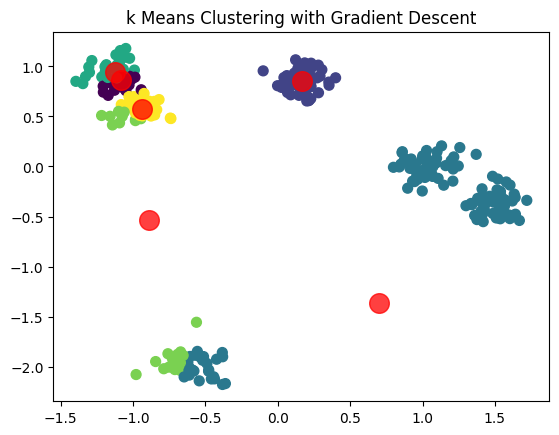

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75)
plt.title('k Means Clustering with Gradient Descent')
plt.show()

Same K mean clustering done with the sklearn library

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=K, random_state=0)
kmeans.fit(X)
clusters = kmeans.predict(X)
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualizing the K mean Clustering with Sklearn

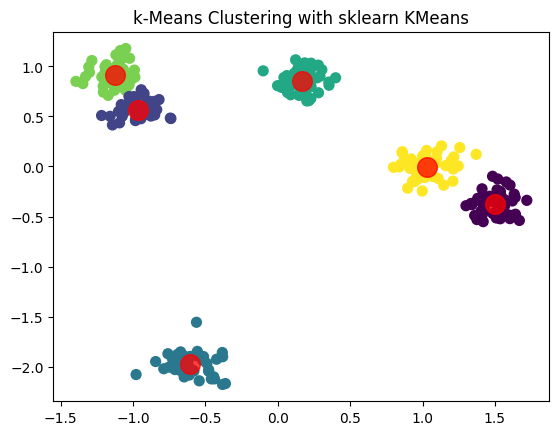

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75)
plt.title('k-Means Clustering with sklearn KMeans')
plt.show()

# Hence proved:

By visualizing the results, we observe that both the gradient descent method and the Sklearn KMeans algorithm yield the same centroids for each cluster. This confirms the correctness of the gradient descent implementation.




# Conclusion:
We developed an updated gradient descent model for K-means clustering. This model can be applied to large and complex datasets, offering flexibility for faster implementation or for gaining a deeper understanding of how the Sklearn KMeans algorithm operates behind the scenes.